<a href="https://colab.research.google.com/github/mastdev/EDA_Rent_Brazil_House/blob/master/LSTM_imdb_8k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
imdb,info=tfds.load("imdb_reviews/subwords8k",with_info=True, as_supervised=True)
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

In [0]:
train_data,test_data= imdb['train'],imdb['test']
tokeniser=info.features['text'].encoder

In [4]:
print(len(tokeniser.subwords))

7928


In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_data.padded_batch(BATCH_SIZE, train_data.output_shapes)
test_dataset = test_data.padded_batch(BATCH_SIZE, test_data.output_shapes)


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 606,529
Trainable params: 606,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 64s 164ms/step - loss: 0.5315 - accuracy: 0.7321 - val_loss: 0.4830 - val_accuracy: 0.7780
Epoch 2/10
391/391 [==============================] - 66s 168ms/step - loss: 0.4958 - accuracy: 0.759

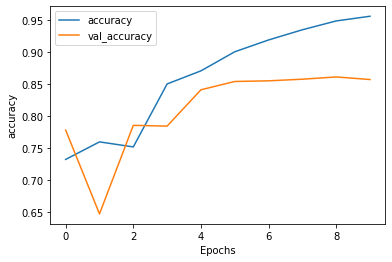

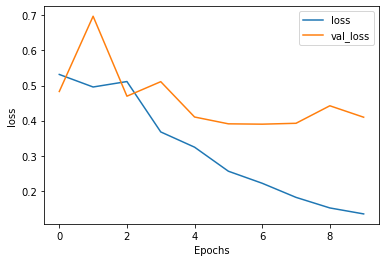

In [9]:
embed_dim=64

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokeniser.vocab_size,embed_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(train_dataset, epochs=10,validation_data=test_dataset)
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 512)         657408    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,887,745
Trainable params: 2,887,745
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 309s 789ms/step - loss: 0.6453 - accuracy: 0.6365 - val_

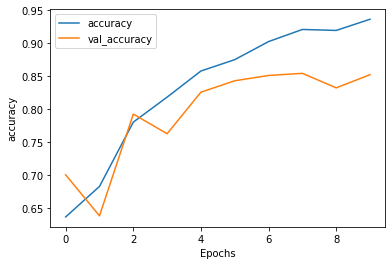

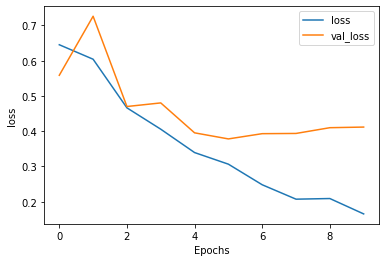

In [7]:
embed_dim=64

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokeniser.vocab_size,embed_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(train_dataset, epochs=10,validation_data=test_dataset,verbose=1)
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")